In [64]:
import pandas as pd
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

In [65]:
data = pd.read_csv('H:/ML Projects/MovieGenre.csv', encoding="ISO-8859-1", usecols=["imdbId", "Title", "Genre", "Poster"])

In [66]:
print(data.columns)

Index(['imdbId', 'Title', 'Genre', 'Poster'], dtype='object')


In [67]:
print("Total Number of Movies is: " + str(len(data.index)))

Total Number of Movies is: 40108


In [68]:
#We will count the number of movies with a specific genre
genrelist = []
length = len(data)
for n in range(0,length):
    genres = str(data.loc[n]["Genre"])
    genres = genres.split("|")
    genrelist.extend(genres)

In [69]:
unique_genres = list(set(genrelist))
print("Total Number of Genres is: " + str(len(unique_genres)))

Total Number of Genres is: 29


Thriller 4816
Biography 1999
Sport 707
Music 1292
Comedy 12682
Talk-Show 7
Action 5331
Documentary 3882
Horror 3990
News 83
Animation 1750
War 1173
Adult 14
Crime 5270
nan 145
Film-Noir 403
Sci-Fi 2020
Reality-TV 2
Western 853
Drama 20053
Family 2100
Romance 6224
Adventure 3829
Musical 845
Short 1066
Mystery 2395
Game-Show 1
History 1426
Fantasy 2012


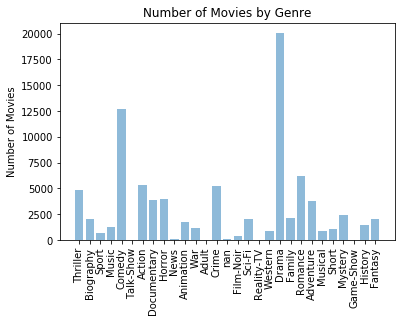

In [70]:
#Print amount of movies with specific genre
countlist = []
k=0
for genre in unique_genres:
    ct = genrelist.count(genre)
    countlist.append(ct)
    print(genre + " " + str(ct))

#Create Bar Graph of values
y_pos = np.arange(len(unique_genres))
plt.bar(y_pos,countlist,align='center',alpha=0.5)
plt.xticks(y_pos,unique_genres,rotation='vertical')
plt.ylabel("Number of Movies")
plt.title("Number of Movies by Genre")
plt.show()

In [71]:
data.set_index(["imdbId"], inplace=True)
data.dropna(inplace=True)
data.drop_duplicates(subset="Poster", keep=False, inplace=True)

In [72]:
len(data)
data.head()

Title                       Genre  \
imdbId                                                                   
114709                    Toy Story (1995)  Animation|Adventure|Comedy   
113497                      Jumanji (1995)     Action|Adventure|Family   
113228             Grumpier Old Men (1995)              Comedy|Romance   
114885            Waiting to Exhale (1995)        Comedy|Drama|Romance   
113041  Father of the Bride Part II (1995)       Comedy|Family|Romance   

                                                   Poster  
imdbId                                                     
114709  https://images-na.ssl-images-amazon.com/images...  
113497  https://images-na.ssl-images-amazon.com/images...  
113228  https://images-na.ssl-images-amazon.com/images...  
114885  https://images-na.ssl-images-amazon.com/images...  
113041  https://images-na.ssl-images-amazon.com/images...

In [73]:
import re

In [74]:
re_year = re.compile("\((\d{4})\)")
data["year"] = data.Title.map(lambda x: int(re_year.findall(x)[0]) if re_year.findall(x) else None)


In [75]:
data["Genre"] = data.Genre.map(lambda x: x.split("|"))
all_genres = set([item for l in data.Genre for item in l])
for genre in all_genres:
    new_var = "is_" + re.sub(r'\W+', '', genre.lower())
    data[new_var] = data.Genre.map(lambda x: genre in x)
data.drop(["Genre"], axis=1, inplace=True)

In [76]:
data.head()

Title  \
imdbId                                       
114709                    Toy Story (1995)   
113497                      Jumanji (1995)   
113228             Grumpier Old Men (1995)   
114885            Waiting to Exhale (1995)   
113041  Father of the Bride Part II (1995)   

                                                   Poster    year  \
imdbId                                                              
114709  https://images-na.ssl-images-amazon.com/images...  1995.0   
113497  https://images-na.ssl-images-amazon.com/images...  1995.0   
113228  https://images-na.ssl-images-amazon.com/images...  1995.0   
114885  https://images-na.ssl-images-amazon.com/images...  1995.0   
113041  https://images-na.ssl-images-amazon.com/images...  1995.0   

        is_thriller  is_biography  is_sport  is_music  is_comedy  is_talkshow  \
imdbId                                                                          
114709        False         False     False     False       True        False   
113497        False         False     False     False      False        False   
113228        False         False     False     False       True        False   
114885        False         False     False     False       True        False   
113041        False         False     False     False       True        False   

        is_action  ...  is_drama  is_family  is_romance  is_adventure  \
imdbId             ...                                                  
114709      False  ...     False      False       False          True   
113497       True  ...     False       True       False          True   
113228      False  ...     False      False        True         False   
114885      False  ...      True      False        True         False   
113041      False  ...     False       True        True         False   

        is_musical  is_short  is_mystery  is_gameshow  is_history  is_fantasy  
imdbId                                                                         
114709       False     False       False        False       False       False  
113497       False     False       False        False       False       False  
113228       False     False       False        False       False       False  
114885       False     False       False        False       False       False  
113041       False     False       False        False       False       False  

[5 rows x 31 columns]

In [81]:
import urllib.request
from urllib.error import HTTPError
import urllib
import cv2
from IPython.display import Image
import os

In [ ]:
for i in range(len(data['Poster'])):
    u = data['Poster'].iloc[i]
    img  = Image(url=u)
    display(img)

In [79]:
img  = Image(url=u)
display(img)